# Visualization of FullProf refinement output

In [15]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

## INPUT DATA

In [35]:
x_array, y_obs_array, y_calc_array = np.loadtxt('cecual.prf', skiprows=6, usecols = (0,1,2), comments='#', unpack=True)
#mult=1
#y_obs = y_obs*mult
#y_calc = y_calc*mult
y_sobs_array = np.loadtxt('cecual.dat', skiprows=6, usecols = (2), comments='#', unpack=True)
x_bragg_array = np.loadtxt('cecual.prf', skiprows=6, usecols = (5), comments='#', unpack=True, max_rows=393)
#print(x_bragg_array)

## OUTPUT QML

In [36]:
xmin = 15000.0#7700#15000.0
xmax = 1000000#19000.0

In [37]:
qml_template = """import QtQuick 2.12
import QtCharts 2.3

LineSeries {
    XYPoint { x: 0; y: 0 }
}
"""

In [38]:
s = ""
for x, y in zip(x_array, y_obs_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('ObsLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [39]:
s = ""
for x, y, sy in zip(x_array, y_obs_array, y_sobs_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y+sy) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('ObsPlusEsdLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [40]:
s = ""
for x, y, sy in zip(x_array, y_obs_array, y_sobs_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y-sy) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('ObsMinusEsdLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [41]:
s = ""
for x, y in zip(x_array, y_calc_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('CalcLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [42]:
s = ""
for x, y_obs, y_calc in zip(x_array, y_obs_array, y_calc_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y_obs-y_calc) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('DiffLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [43]:
s = ""
for x, y_obs, sy_obs, y_calc in zip(x_array, y_obs_array, y_sobs_array, y_calc_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y_obs+sy_obs-y_calc) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('DiffPlusEsdLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [44]:
s = ""
for x, y_obs, sy_obs, y_calc in zip(x_array, y_obs_array, y_sobs_array, y_calc_array):
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: " + str(y_obs-sy_obs-y_calc) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
with open('DiffMinusEsdLineSeries.qml', 'w') as f:
    f.write(qml_content)

In [48]:
s = ""
for x in x_bragg_array:
    if x > xmin and x < xmax:
        s += "XYPoint { x: " + str(x) + "; y: 0.0 }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
qml_content = qml_content.replace("LineSeries", "ScatterSeries")
with open('BraggScatterSeries.qml', 'w') as f:
    f.write(qml_content)

In [49]:
s = ""
for x in x_bragg_array:
    if x > xmin and x < xmax:
        for i in range(11):
            s += "XYPoint { x: " + str(x) + "; y: " + str(i) + " }\n    "
qml_content = qml_template.replace("XYPoint { x: 0; y: 0 }", s)
qml_content = qml_content.replace("LineSeries", "ScatterSeries")
with open('BraggScatterSeries.qml', 'w') as f:
    f.write(qml_content)

## OUTPUT DATA

In [10]:
file_name = 'cecual.txt'
fmt = '%12.2f%12.2f%12.2f%12.2f'
header = "         TOF        Yobs       sYobs       Ycalc"
np.savetxt(file_name, np.column_stack([x_array, y_obs_array, y_sobs_array, y_calc_array]), fmt=fmt, header=header, comments='')

<IPython.core.display.Javascript object>


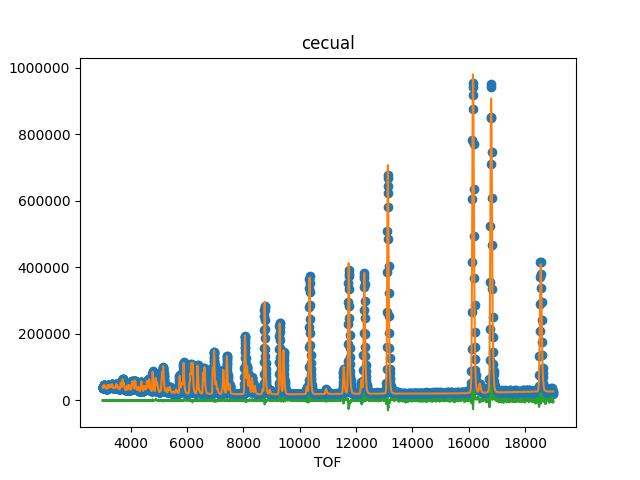

In [11]:
#plt.xlim(16000.0, 17000.0)
plt.figure(0)
plt.plot(x_array, y_obs_array, 'o', x_array, y_calc_array, '-', x_array, y_obs_array - y_calc_array, '-')
plt.xlabel("TOF")
plt.title("cecual")
plt.show()